# understanding problem 

 - Objective: Predict whether an individual's income exceeds $50K/year (class: >50K) or is below or equal to $50K/year (class: <=50K).

## Age:

-  The age of the individual. Typically measured in years.
## Sex:

- The gender of the individual, often encoded as binary (e.g., male and female or as 0 and 1).
## BMI (Body Mass Index):

-  A measure of body fat based on height and weight. Commonly calculated as weight in kilograms divided by the square of height in meters (kg/m²). A higher BMI often indicates higher body fat.
## Children:

- The number of dependents or children the individual has.
## Smoker:

- Indicates whether the individual smokes. Typically encoded as yes or no, or as binary values (e.g., 1 for smoker, 0 for non-smoker).
- Role: This is the target variable in your dataset.
## Region:

 - The geographical region where the individual resides. Common categories might include northeast, northwest, southeast, and southwest.
## Charges:

 The medical charges billed to the individual, usually measured in a currency like USD. This can indicate healthcare expenses.

# Import library 

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
RANDOM_STATE = 42
import datetime as dt


# dataset

## load dataset 

In [3]:
dataset=pd.read_csv(r'C:\Users\lap shop\OneDrive\Documents\GDG\TASL  5\insurance.csv')

## about dataset

In [5]:
dataset.head(40)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dataset.shape

(1338, 7)

In [9]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
dataset.duplicated().sum()


1

In [12]:
dataset.drop_duplicates(inplace= True)


In [13]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# anyliys feats

## target 

In [14]:
dataset['smoker'].describe()

count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object

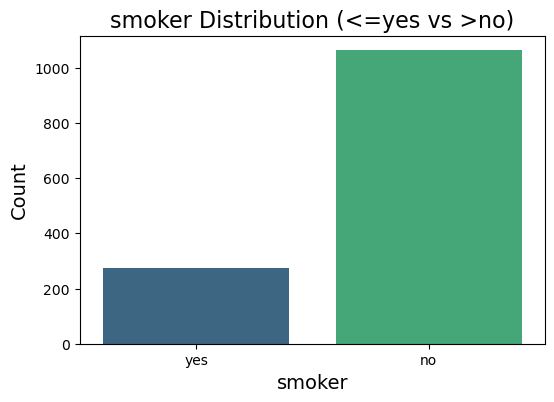

In [17]:
plt.figure(figsize=(6,4))

sns.countplot(x='smoker', data=dataset, palette='viridis')

plt.title('smoker Distribution (<=yes vs >no)', fontsize=16)
plt.xlabel('smoker', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

- is implanced dataset 

In [18]:
dataset['smoker'] = dataset['smoker'].apply(lambda x: 1 if x == '>50K' else 0)


## numircal_coulmns 

In [19]:
numerical_cols= dataset.select_dtypes(exclude=object)


C:\Users\lap shop\AppData\Local\Temp\ipykernel_6968\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_6968\264624390.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\lap shop\AppData\Local\Temp\ipykernel_6968\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

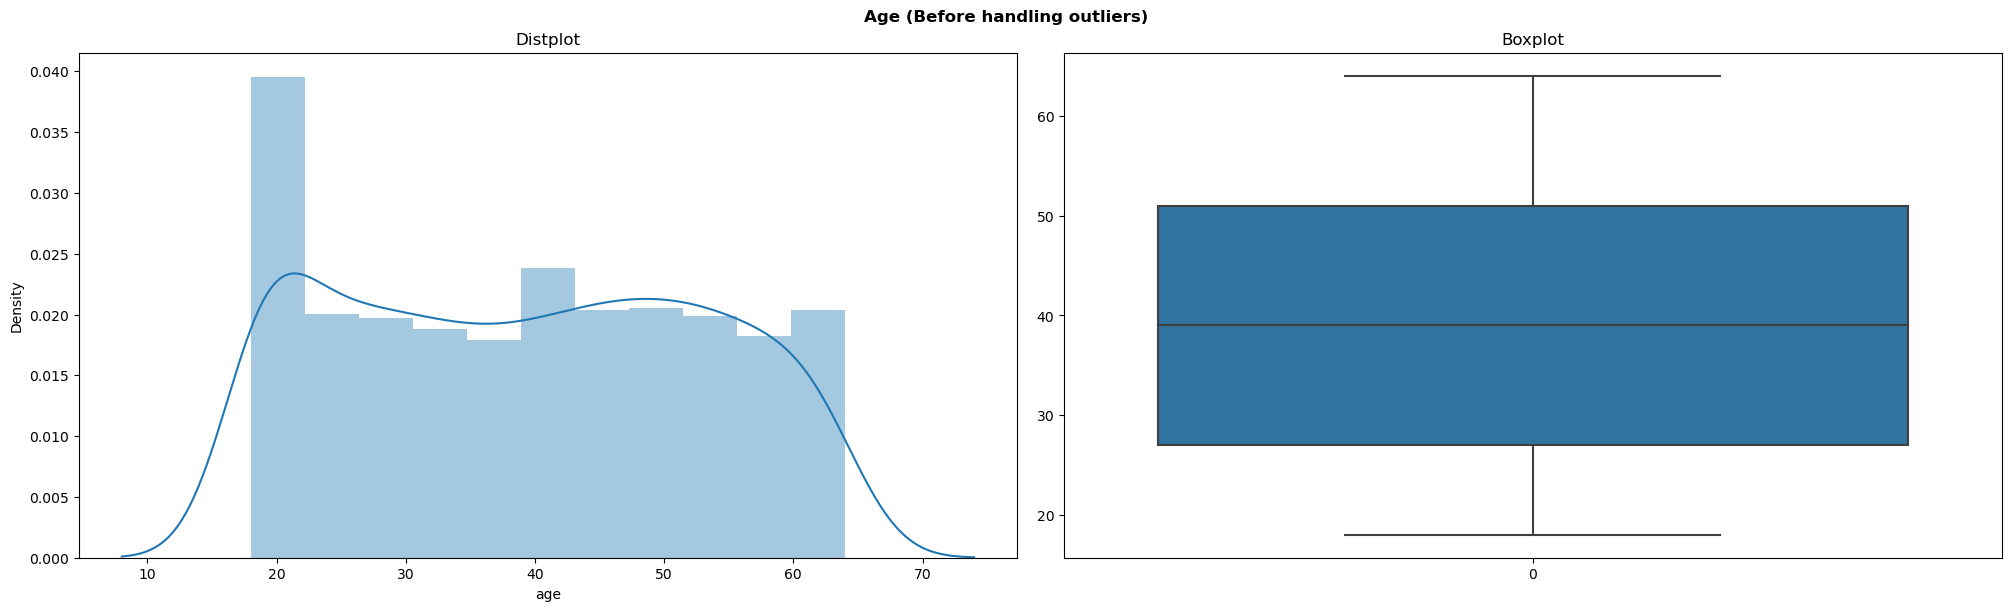

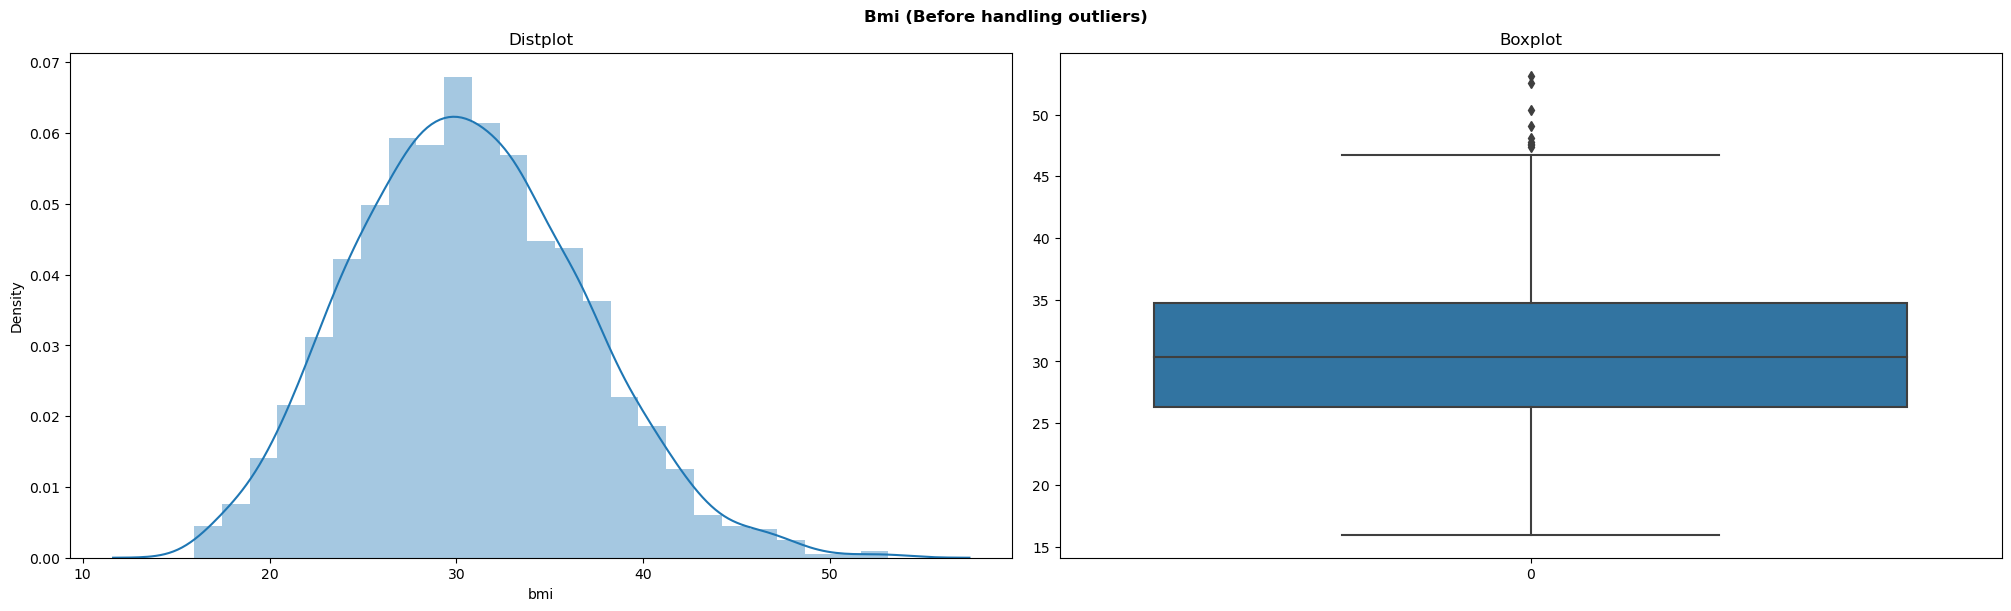

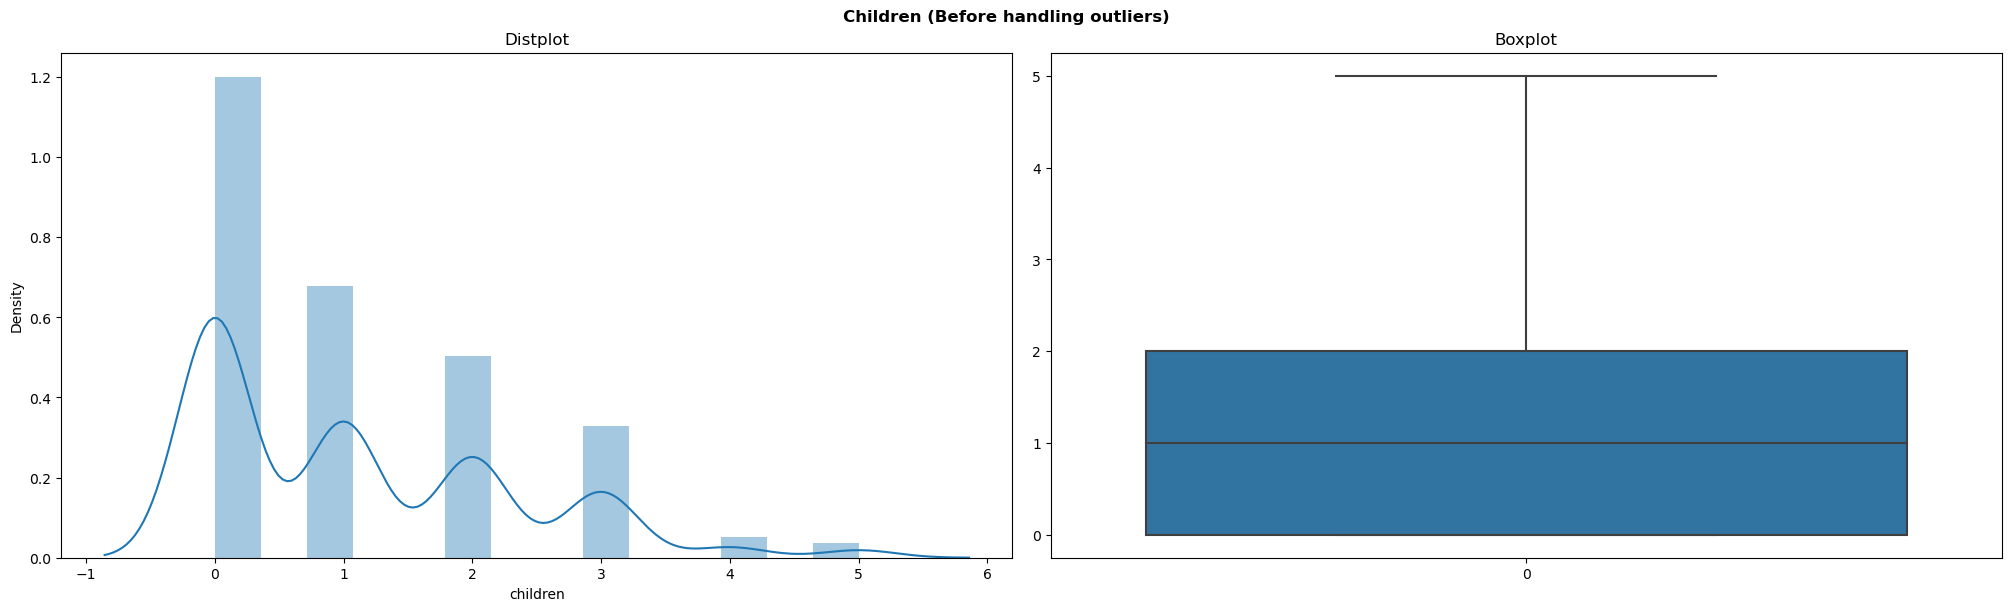

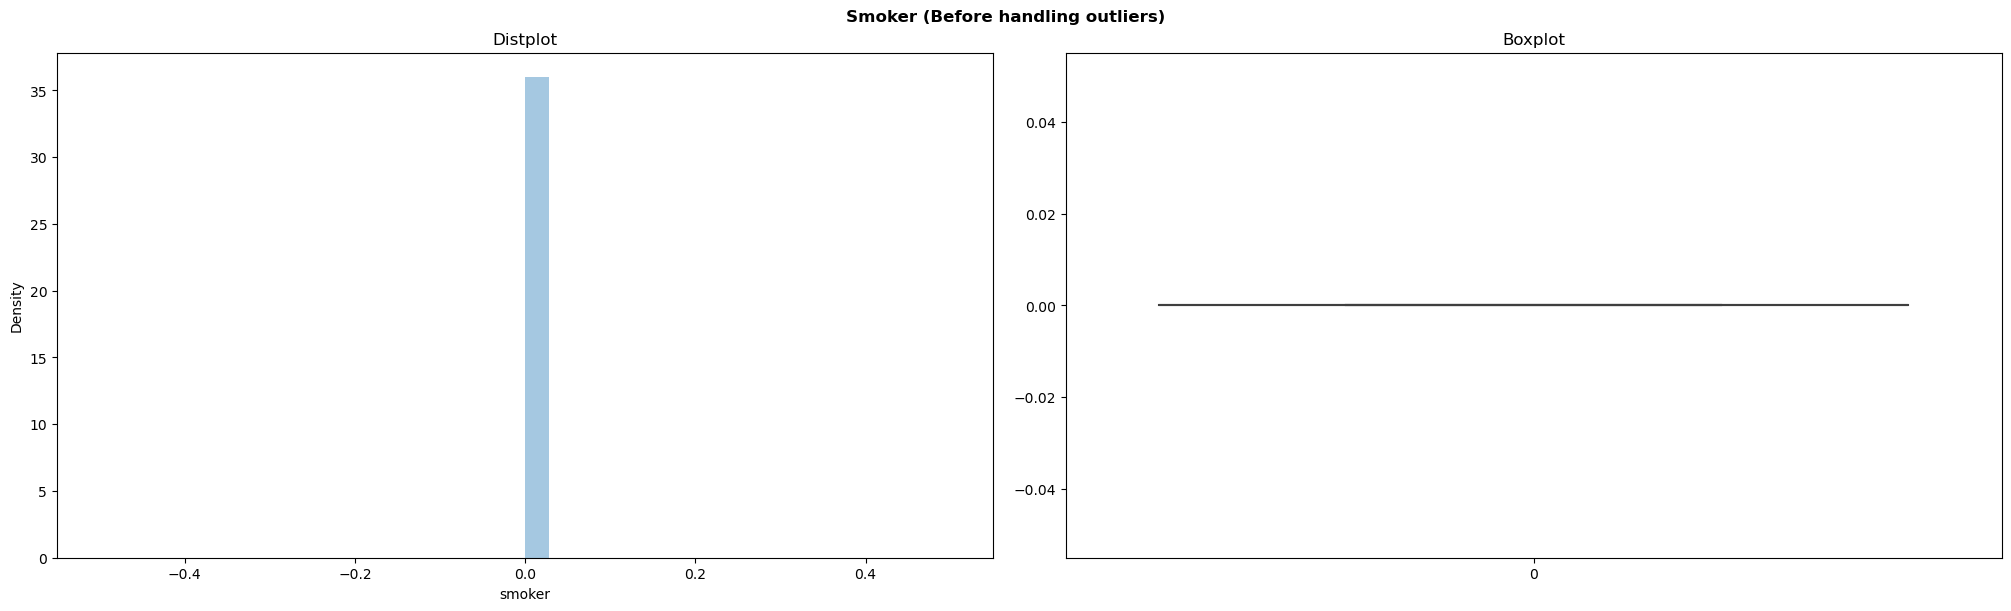

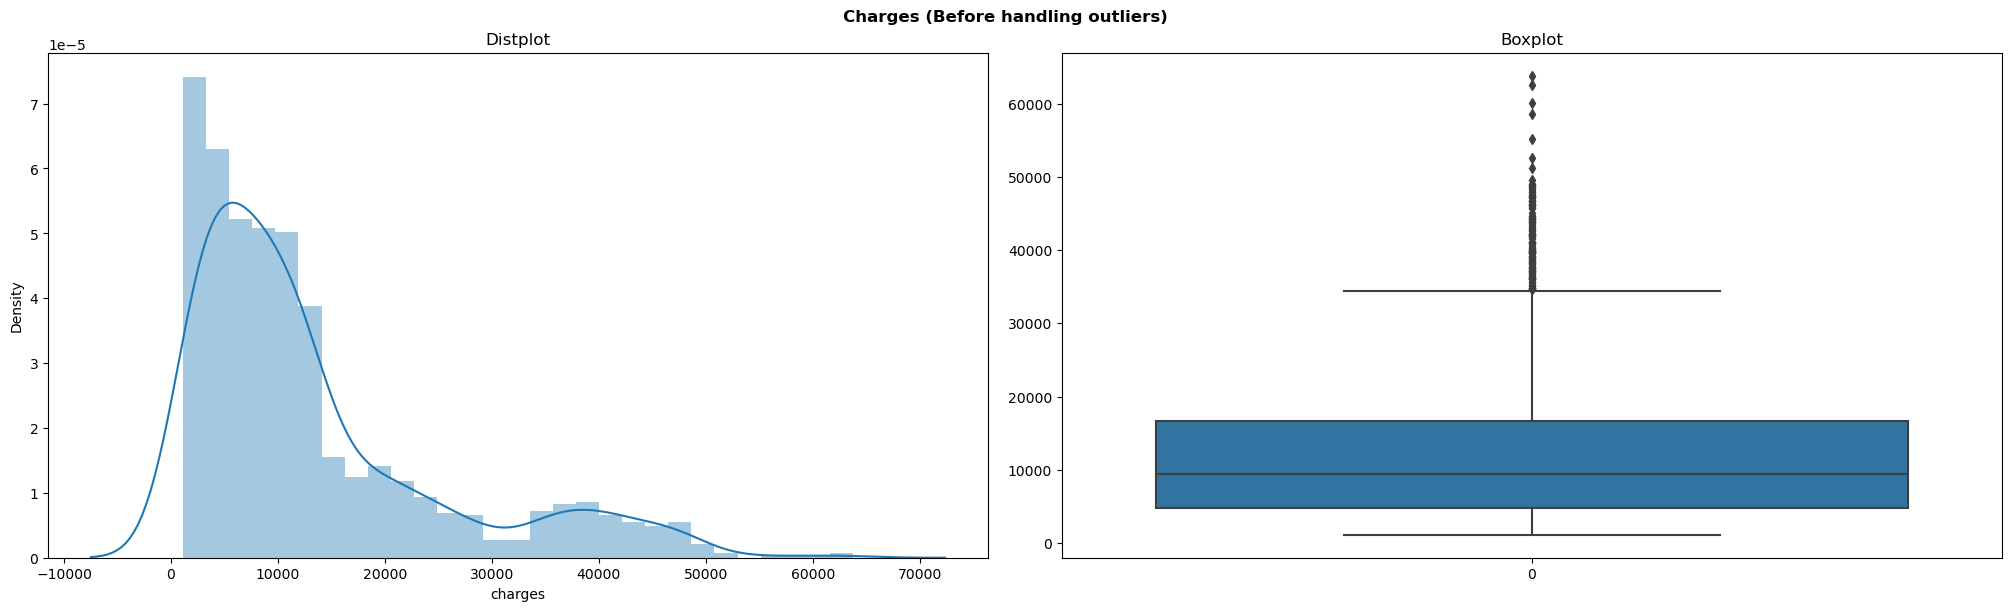

In [21]:
for col in numerical_cols:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(dataset[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

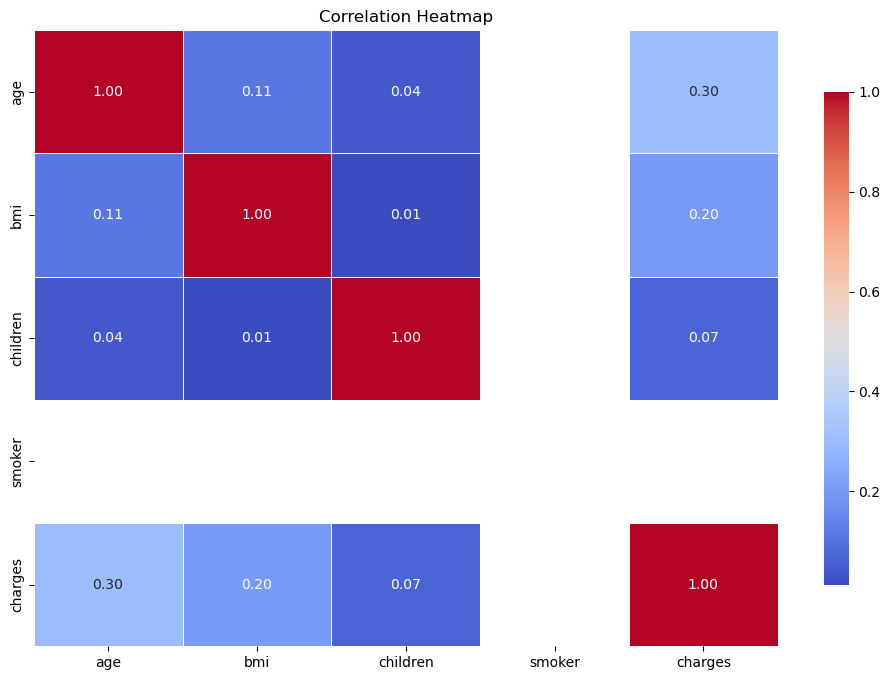

In [23]:
cor= dataset.select_dtypes(exclude=object).corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(cor, annot=True, linewidths=0.6, cmap='coolwarm', cbar_kws={'shrink': 0.8}, fmt=".2f")

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

## cat feats

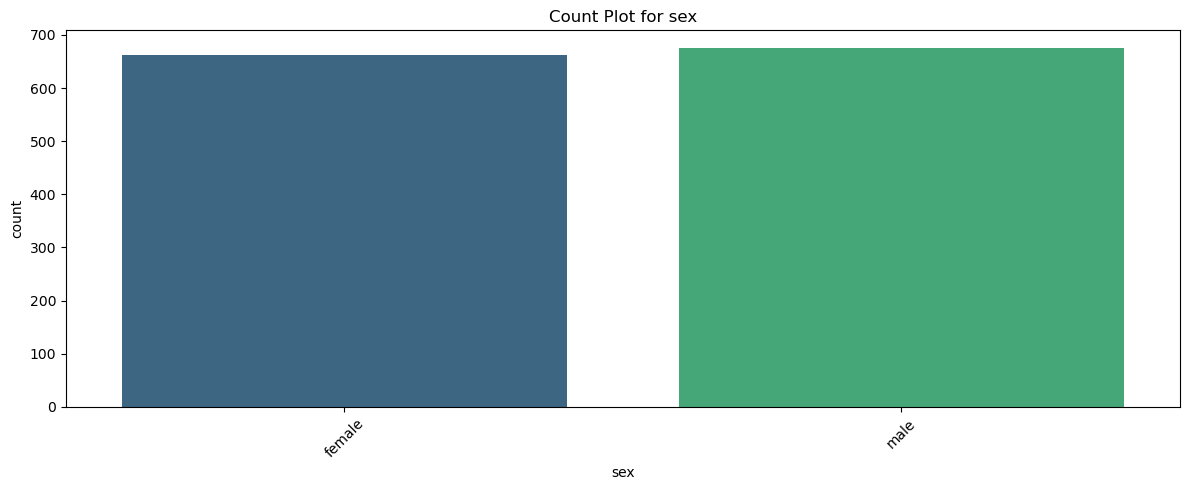

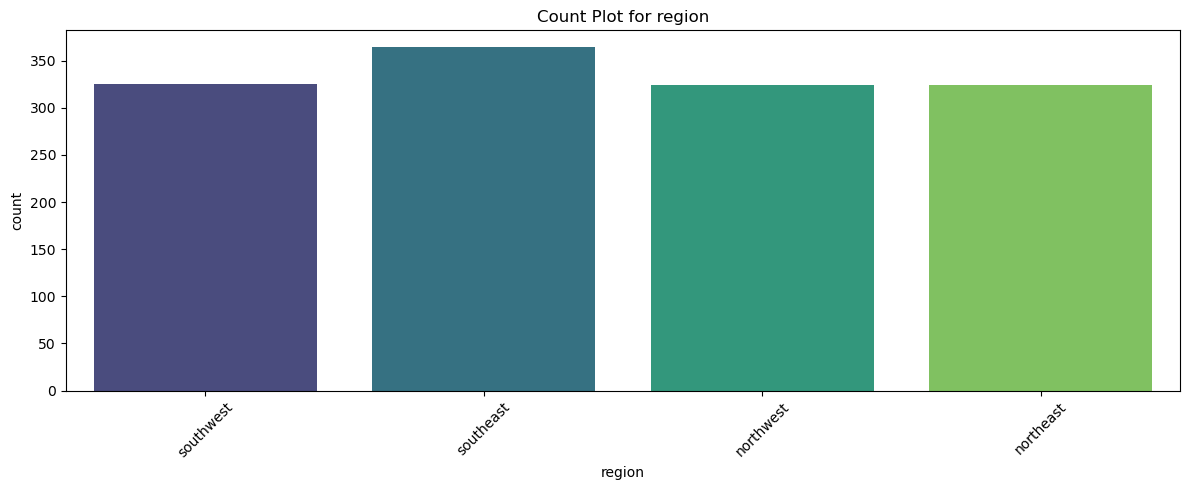

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_features = ["sex","region"]  

for feature in cat_features:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=dataset, x=feature, palette="viridis")
    plt.title(f'Count Plot for {feature}')
    plt.xticks(rotation=45)  
    plt.tight_layout()       
    plt.show()


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 115.9+ KB


## split data_set

## preprocessing and modeliing 

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

cat_features = ["sex", "region", "children"]
num_features = ["bmi", "charges", "age"]

X = dataset.drop(columns=["smoker"])
y = dataset["smoker"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define preprocessing for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", RobustScaler(), num_features),
    ]
)

# Define the pipeline with preprocessing and the RandomForestClassifier
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=100, random_state=42)),
    ]
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268


Confusion Matrix:
[[268]]


C:\Users\lap shop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
